## Customer Churn Prediction

Author: Adebayo Aonullahi

Aim: 
1. To Predict if Customers will continue to subscribe to the service provide
2. To highlight major reasons why customers churn
3. To recommend possible solutions to curb the customer churn

### Exploratory Analysis

In [1]:
#Import Libraries for Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.util.testing as tm
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


In [2]:
#file path
file = r"C:\Users\AONU\Downloads\customer-churn-prediction-master\customer-churn-prediction-master\Telco-Customer-Churn.csv" 

In [3]:
#load file
df = pd.read_csv(file)

In [4]:
#view data shape and first 5 rows
print('The data has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
df.head()

The data has 7043 rows and 21 columns


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#checking missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Non-numeric columns description
df.describe(exclude='number').T

,count,unique,top,freq
customerID,7043,7043,7629-WIXZF,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [8]:
#Numeric columns description
df.describe(include='number')

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
#Looking up TotalCharges
df[['MonthlyCharges', 'TotalCharges', 'tenure', 'SeniorCitizen']]

,MonthlyCharges,TotalCharges,tenure,SeniorCitizen
0,29.85,29.85,1,0
1,56.95,1889.5,34,0
2,53.85,108.15,2,0
3,42.30,1840.75,45,0
4,70.70,151.65,2,0
...,...,...,...,...
7038,84.80,1990.5,24,0
7039,103.20,7362.9,72,0
7040,29.60,346.45,11,0
7041,74.40,306.6,4,1



By inspection and logic;
- TotalCharges = MonthlyCharges * tenure

In [11]:
#Fixing TotalCharges
df['TotalCharges'] = df['MonthlyCharges'] * df['tenure'] 

In [12]:
#Checking dtypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

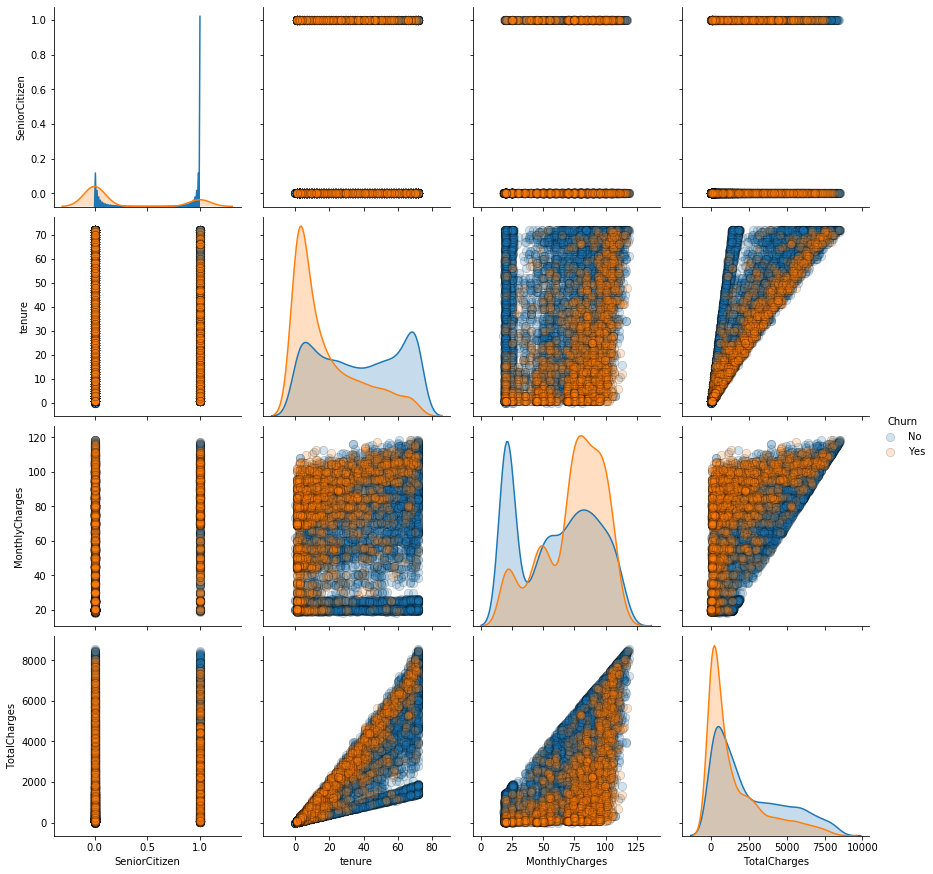

In [13]:
# Create the default pairplot
sns.pairplot(df, hue = 'Churn', diag_kind = 'kde',
             plot_kws = {'alpha': 0.2, 's': 70, 'edgecolor': 'k'},
             height = 3)
plt.show()

In [14]:
def morcat(x,y,r,c):
    sns.lmplot(x=x, y=y, row=r, col=c,data=df)


Text(0.5, 0.98, 'Some Insightful Charts')

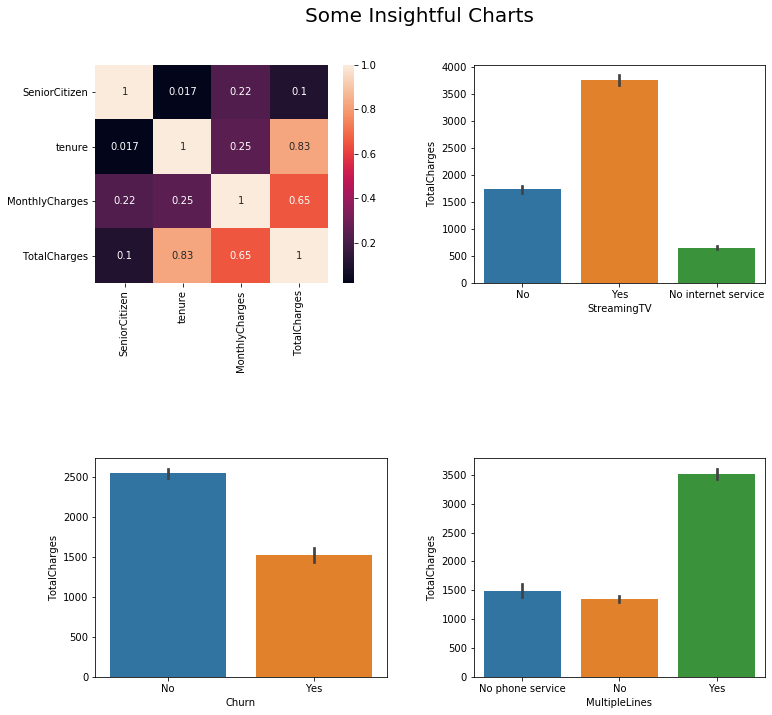

In [15]:
fig, ax = plt.subplots(figsize=(12,10), ncols=2, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.05    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .3     # the amount of width reserved for blank space between subplots
hspace =  0.8    # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

sns.barplot('StreamingTV','TotalCharges',data=df, ax=ax[0][1])
sns.barplot('Churn','TotalCharges',data=df, ax=ax[1][0])
sns.barplot('MultipleLines','TotalCharges',data=df, ax=ax[1][1])
sns.heatmap(df.corr(),annot=True, ax=ax[0][0])

plt.suptitle("Some Insightful Charts", fontsize=20)

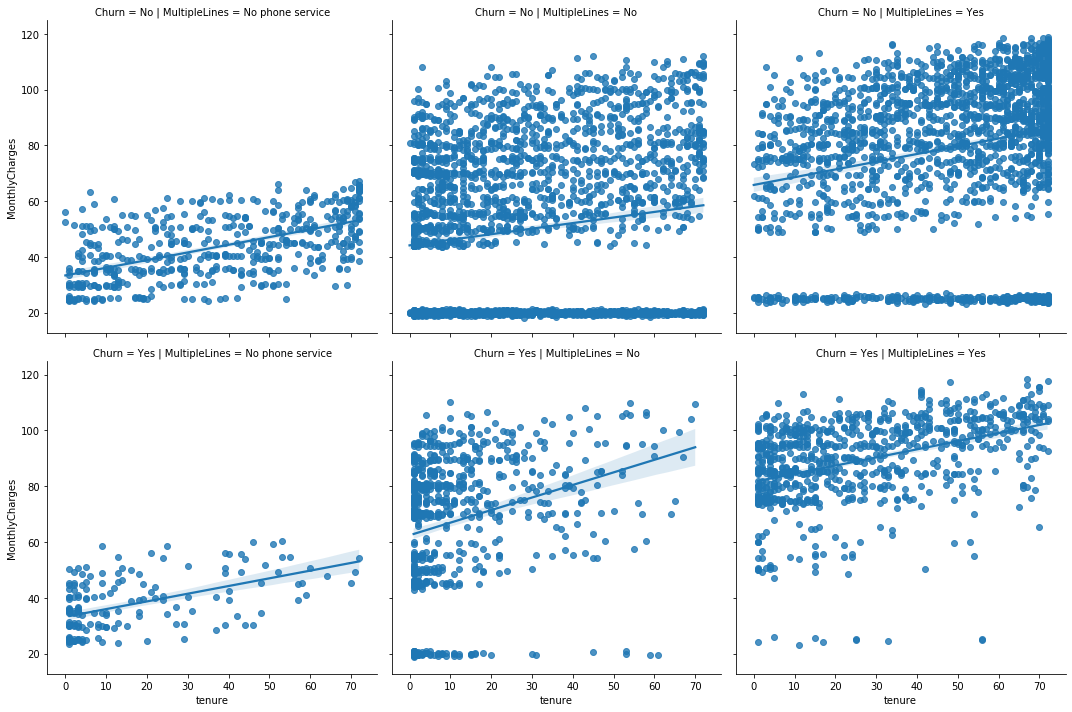

In [16]:
morcat('tenure','MonthlyCharges','Churn','MultipleLines')

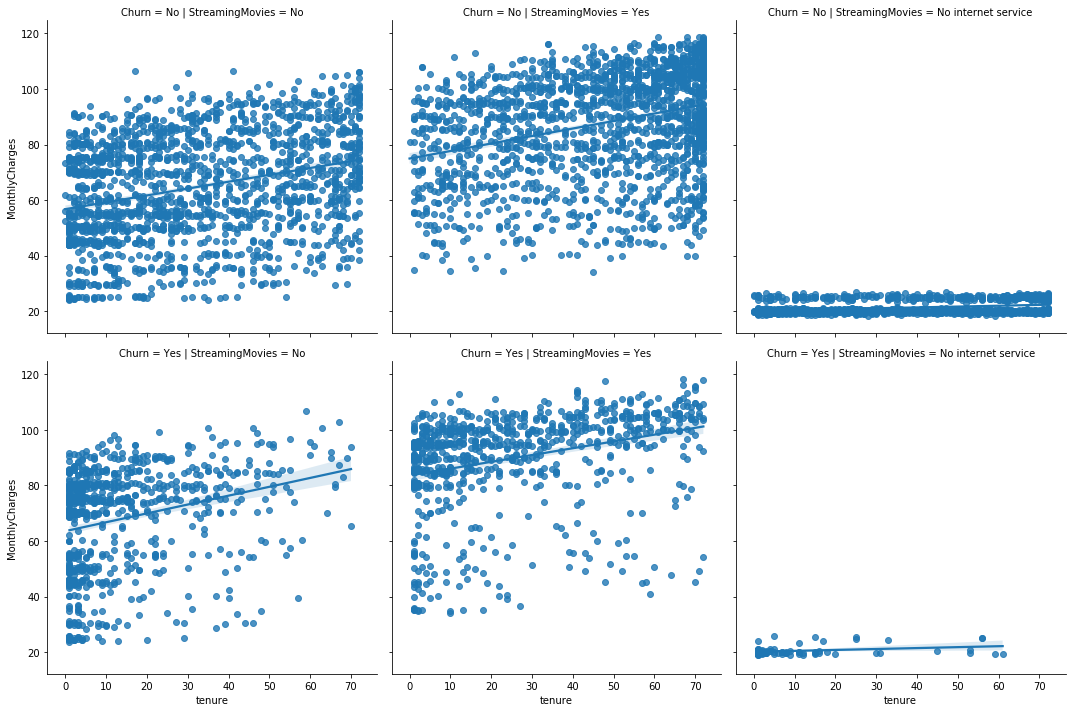

In [17]:
morcat('tenure','MonthlyCharges','Churn','StreamingMovies')

### Summary of the insights from the above visuals

   1. It is evident from the chart that customers with streaming service activated have the highest charges and churn the most.
   2. Customers tend to churn in the first 20 months of subscription, only few customers churn after 20 months.
   3. High revenue comes from streaming services.
   4. Most cusomers have multiple lines.


### Data Pre-processing

In [18]:
#Categorical variable transformation libraries
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [19]:
#drop customer ID
df.drop('customerID', axis=1, inplace=True)

In [20]:
df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})

In [21]:
#View top rows
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,1


In [22]:
#Get object columns
df.select_dtypes(object).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [23]:
#Coulmn Transformation
column_trans = make_column_transformer(
    (OneHotEncoder(sparse=False), ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']),
    remainder=StandardScaler())

In [24]:
#Data Assignment
X = df.iloc[:,:-1]
y = df.Churn

In [25]:
#Checking shape
print('\tThe shape of of the transformed features is {} while the original features shape is {}.'
      .format(column_trans.fit_transform(X).shape,X.shape ))
print("\nHowever, column_trans.fit is not a place holder, hence does not overwrite the original data structure.")

	The shape of of the transformed features is (7043, 45) while the original features shape is (7043, 19).

However, column_trans.fit is not a place holder, hence does not overwrite the original data structure.


### Model Tuning and Optimization

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Load and split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct some pipelines

pipe_lr = Pipeline([('coltrans', column_trans),
            ('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('coltrans', column_trans),
            ('clf', RandomForestClassifier(max_features = 'auto', random_state=0, n_estimators=100))])

pipe_svm = Pipeline([('coltrans', column_trans),
            ('clf', svm.SVC(random_state=42))])


# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1','l2'],
            'clf__C': param_range_fl,
            'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__min_samples_leaf': param_range[::2],
                'clf__max_depth': param_range[::2],
                'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
            'clf__C': param_range}]

# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='accuracy',
            cv=10) 

gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='accuracy',
            cv=10, 
            n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)


# List of pipelines for ease of iteration
grids = [gs_lr, gs_rf, gs_svm]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Random Forest', 2: 'Support Vector Machine'}


# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''

for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.802
Test set accuracy score for best params: 0.821 

Estimator: Random Forest
Best params: {'clf__max_depth': 9, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 2}
Best training accuracy: 0.804
Test set accuracy score for best params: 0.806 

Estimator: Support Vector Machine
Best params: {'clf__C': 1, 'clf__kernel': 'linear'}
Best training accuracy: 0.797
Test set accuracy score for best params: 0.820 

Classifier with best test set accuracy: Logistic Regression


### Model Evaluation

In [27]:
#Dummy Classifier performance
from sklearn.dummy import DummyClassifier
pipe_dummy = Pipeline([('coltrans', column_trans),
            ('clf', DummyClassifier(strategy = 'most_frequent'))])
pipe_dummy.fit(X_train, y_train)
pipe_dummy.score(X_test, y_test)

print(' The dummy classifier has a training score of {:.3f} and with best test score {:.3f}'.format(pipe_dummy.score(X_train, y_train),
                                                                             pipe_dummy.score(X_test, y_test)))

 The dummy classifier has a training score of 0.734 and with best test score 0.735


In [28]:
#using optima model parameters
#Best params: {'clf__max_depth': 9, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 2}
pipe_lr_best = Pipeline([('coltrans', column_trans),
            ('clf', LogisticRegression(C=1, penalty='l2', solver='liblinear', random_state=42))])

pipe_lr_best.fit(X_train, y_train)
y_pred = pipe_lr_best.predict(X_test)

Text(0.5, 1, 'Confusion Matrix (Accuracy Score: 0.821)')

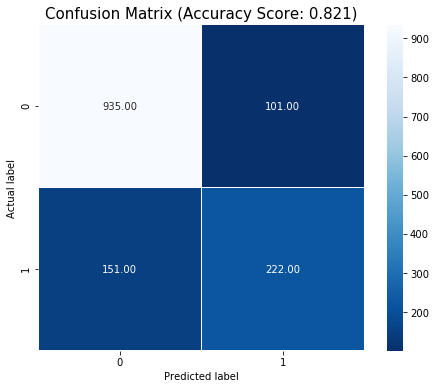

In [29]:
#Confusion Matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix (Accuracy Score: {0:.3f})'.format(accuracy_score(y_test, y_pred ))
plt.title(all_sample_title, size = 15)

In [30]:
#OverallAccuracy
from sklearn.model_selection import cross_val_score
score = cross_val_score(pipe_lr_best, X, y, cv=10, scoring='accuracy').mean()
print('The model accuracy on the entire is {:.2f}%'.format(score*100))

The model accuracy on the entire is 80.39%


Important Notes:
    
    1. The aim of this work is to predict accurately customers that will churn (label = 1), hence improved recall score is a 
    good measure.
    
    2. Improve feature selection with interpretable features to best categorize strong features affecting customer churn
    

### Work in progress...